# Battery Cars Workbook


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt # for making graphs
import seaborn as sns

# Set to correct working directory
directory = '/Users/inhwamo/Documents/fuel_consumption/data/consumption_clean'
os.chdir(directory)


In [16]:
# Reading the data and filtering necessary columns
battery = pd.read_csv('battery.csv')
filtered_battery_cars = battery[['make', 'model', 'class', 'motor', 'range', 'recharge_time']]

# Calculating efficiency score
filtered_battery_cars['efficiency_score'] = filtered_battery_cars['range'] / filtered_battery_cars['recharge_time']

# Sorting by efficiency and taking top 25
top_cars_efficiency = filtered_battery_cars.sort_values(by='efficiency_score', ascending=False).head(25)

# Manually inputting prices (ideally this would be merged/joined from another dataframe)
top_cars_efficiency['price'] = [49000, 63000, 'unknown', 'unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown']

#Lucid price data is missing
top_cars_range = filtered_battery_cars.sort_values(by='range', ascending=False).head(25)
top_cars_range['price'] = ['unknown', 'unknown', 'unknown', 'unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown']

top_cars_recharge = filtered_battery_cars.sort_values(by='recharge_time', ascending=True).head(25)
top_cars_recharge['price'] = [49000, 63000, 'unknown', 'unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
                     'unknown','unknown','unknown','unknown','unknown']

# Counting unique makes
num_makes = filtered_battery_cars['make'].nunique()
print(f"There are {num_makes} unique makes in the dataset.")


There are 24 unique makes in the dataset.


/var/folders/vn/z092srkj237125336k_n8tq40000gn/T/ipykernel_5380/2634933560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_battery_cars['efficiency_score'] = filtered_battery_cars['range'] / filtered_battery_cars['recharge_time']


## All battery cars

/var/folders/vn/z092srkj237125336k_n8tq40000gn/T/ipykernel_5380/2746923239.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=battery, x='range', y='recharge_time', palette='husl')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


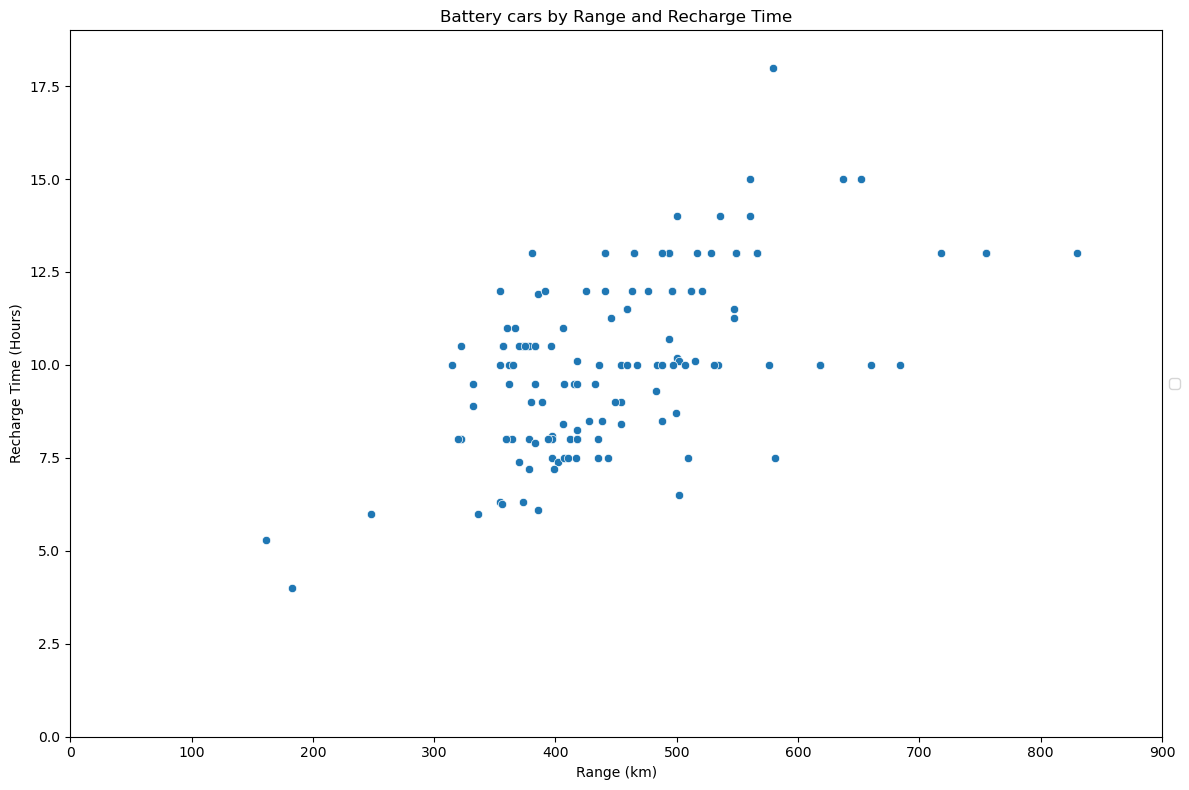

In [43]:
# Plot for all battery cars
plt.figure(figsize=(12, 8))
sns.scatterplot(data=battery, x='range', y='recharge_time', palette='husl')

# Set axis limits. Same axis limits for all plots
plt.xlim(0, 900)
plt.ylim(0, 19)
plt.title('Battery cars by Range and Recharge Time')
plt.xlabel('Range (km)')
plt.ylabel('Recharge Time (Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()


## Cars by make

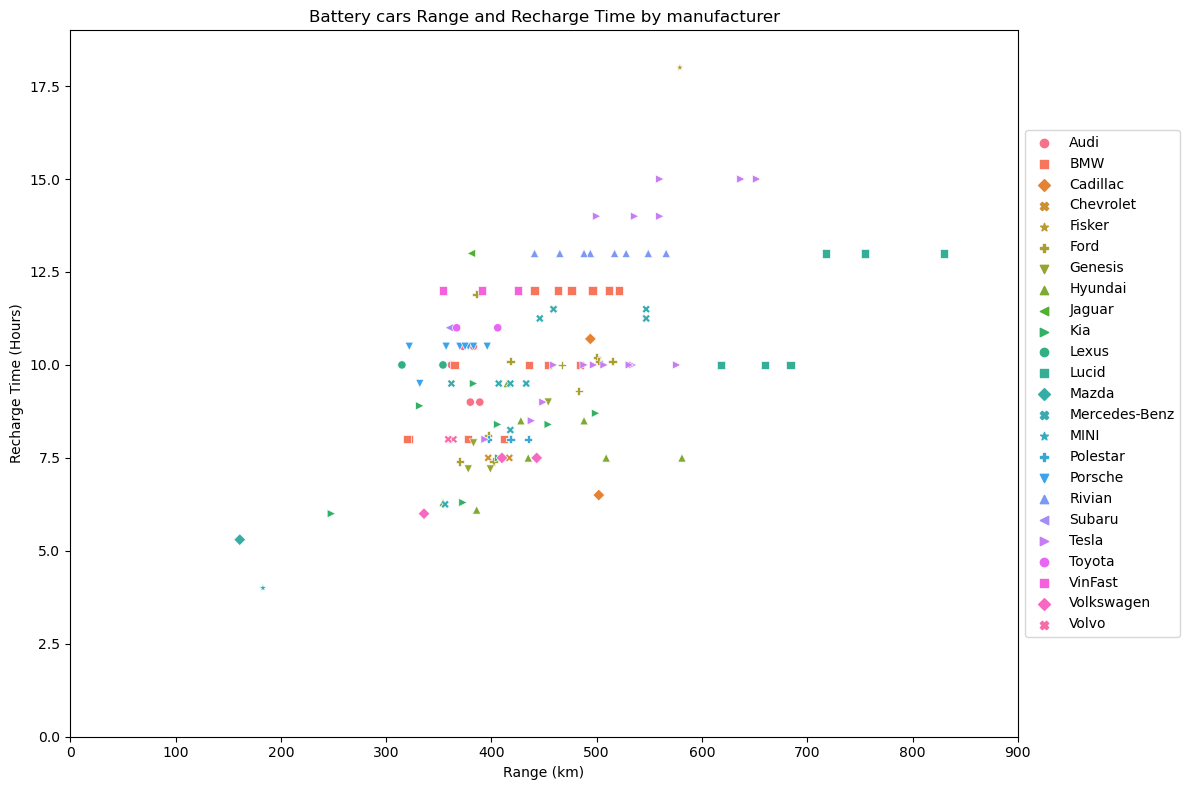

In [42]:
# Plot all cars by make

# # Markers for all battery cars
# unique_makes_all = filtered_battery_cars['make'].unique()
# available_markers_all = ['o', 's', 'D', 'X', '*', 'P', 'v', '^', '<', '>']
# repeated_markers_all = available_markers_all * (len(unique_makes_all) // len(available_markers_all) + 1)
# markers_dict_all = dict(zip(unique_makes_all, repeated_markers_all))
all_makes = pd.concat([filtered_battery_cars['make'], top_cars_efficiency['make']]).unique()
available_markers_all = ['o', 's', 'D', 'X', '*', 'P', 'v', '^', '<', '>']
repeated_markers_all = available_markers_all * (len(all_makes) // len(available_markers_all) + 1)
markers_dict_all = dict(zip(all_makes, repeated_markers_all))



plt.figure(figsize=(12, 8))

# Set axis limits
plt.xlim(0, 900)
plt.ylim(0, 19)

sns.scatterplot(data=filtered_battery_cars, x='range', y='recharge_time', 
                hue='make', style='make', palette='husl', 
                hue_order=all_makes, style_order=all_makes, markers=markers_dict_all)

plt.title('Battery cars Range and Recharge Time by manufacturer')
plt.xlabel('Range (km)')
plt.ylabel('Recharge Time (Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.savefig("all_car_plot.jpg")
plt.show()


## Manufacturers by range and recharge_time avgs

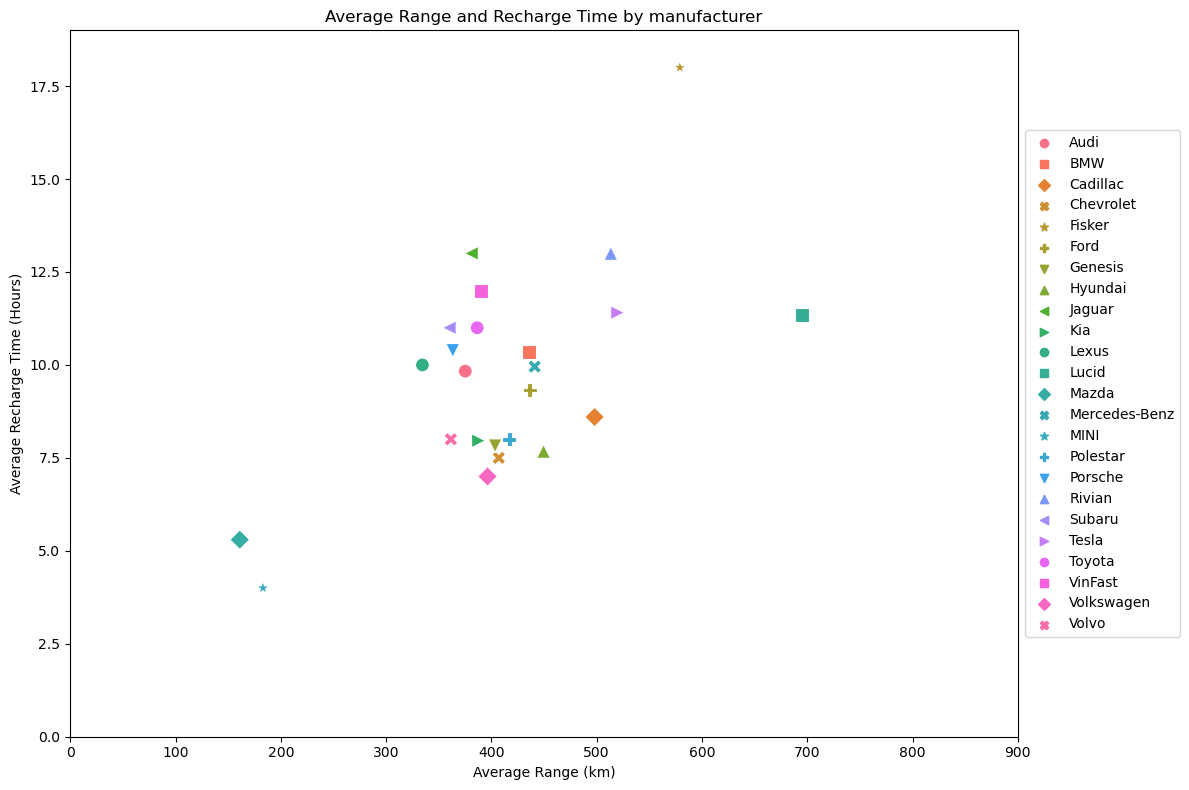

In [45]:
# Plot car averages by manufacturer

# Group by 'make' and calculate mean for 'range' and 'recharge_time'
averages = filtered_battery_cars.groupby('make')[['range', 'recharge_time']].mean().reset_index()

plt.figure(figsize=(12, 8))

# Use the same markers as before for consistency
sns.scatterplot(data=averages, x='range', y='recharge_time', 
                hue='make', style='make', palette='husl', 
                markers=markers_dict_all, s=100, 
                hue_order=all_makes, style_order=all_makes)

plt.xlim(0, 900)
plt.ylim(0, 19)
plt.title('Average Range and Recharge Time by manufacturer')
plt.xlabel('Average Range (km)')
plt.ylabel('Average Recharge Time (Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.savefig("average_car_plot.jpg")
plt.show()


## Range over recharge time

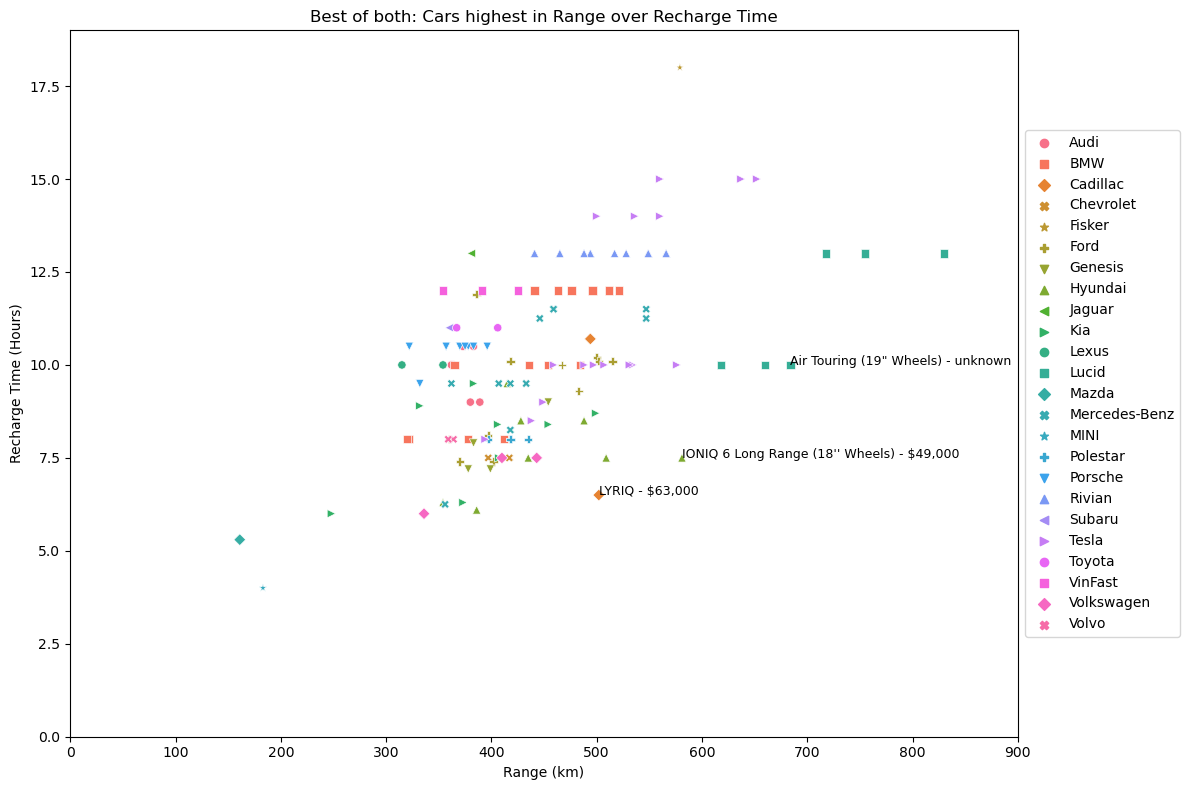

In [38]:
# plot for top cars by efficiency
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_battery_cars, x='range', y='recharge_time', hue='make', 
                style='make', palette='husl', markers=markers_dict_all,
                hue_order=all_makes, style_order=all_makes)

plt.xlim(0, 900)
plt.ylim(0, 19)
plt.title('Best of both: Cars highest in Range over Recharge Time')
plt.xlabel('Range (km)')
plt.ylabel('Recharge Time (Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Annotate names and prices of the top 3 cars
cars_to_annotate = top_cars_efficiency.head(3)
for x, y, model, price in zip(cars_to_annotate['range'], cars_to_annotate['recharge_time'], cars_to_annotate['model'], cars_to_annotate['price']):
    if isinstance(price, int):  # Checking if price exists. Lucid is missing price data.
        label = f"{model} - ${price:,}"
    else:
        label = f"{model} - {price}"
    plt.annotate(label, (x, y), fontsize=9)

plt.tight_layout()
plt.savefig("top_car_plot.jpg")
plt.show()


## Best cars

In [22]:
print('Top 10 cars in terms of efficiency (range/recharge time):')
print(top_cars_efficiency.head(10))

print('Top 10 cars in terms of range (km):')
print(filtered_battery_cars.sort_values(by='range', ascending=False).head(10))

print('Top 10 cars in terms of recharge time (hours):')
print(filtered_battery_cars.sort_values(by='recharge_time', ascending=True).head(10))

Top 10 cars in terms of efficiency (range/recharge time):
        make                                 model       class  motor  range  \
47   Hyundai      IONIQ 6 Long Range (18'' Wheels)    Mid-size  168.0  581.0   
23  Cadillac                                 LYRIQ  SUV: Small  254.0  502.0   
68     Lucid              Air Touring (19" Wheels)   Full-size  462.0  684.0   
48   Hyundai  IONIQ 6 Long Range AWD (18'' Wheels)    Mid-size  239.0  509.0   
66     Lucid                 Air Pure (19" Wheels)   Full-size  358.0  660.0   
62     Lucid     Air Grand Touring XR (19" Wheels)   Full-size  611.0  830.0   
46   Hyundai                IONIQ 6 Standard Range    Mid-size  111.0  386.0   
69     Lucid              Air Touring (20" Wheels)   Full-size  462.0  618.0   
70     Lucid              Air Touring (21" Wheels)   Full-size  462.0  618.0   
67     Lucid                 Air Pure (20" Wheels)   Full-size  358.0  618.0   

    recharge_time  efficiency_score    price  
47            

## Best car manufacturers

In [36]:
print('Top 10 car manufacturers in terms of average range (km):')
print(averages.sort_values(by='range', ascending=False).head(10))

print('Top 10 car manufacturers in terms of average recharge time (hours):')
print(averages.sort_values(by='recharge_time', ascending=True).head(10))

print('Top 10 car manufacturers in terms of average efficiency (range/recharge time):')
print(averages.sort_values(by='efficiency_score', ascending=False).head(10))

Top 10 car manufacturers in terms of average range (km):
             make       range  recharge_time  efficiency_score
11          Lucid  695.111111      11.333333         61.333333
4          Fisker  579.000000      18.000000         32.166667
19          Tesla  519.875000      11.406250         45.578082
17         Rivian  513.450000      13.000000         39.496154
2        Cadillac  498.000000       8.600000         57.906977
7         Hyundai  449.500000       7.675000         58.566775
14  Mercedes-Benz  441.090909       9.954545         44.310502
5            Ford  436.363636       9.327273         46.783626
1             BMW  435.882353      10.352941         42.102273
15       Polestar  417.000000       8.000000         52.125000
Top 10 car manufacturers in terms of average recharge time (hours):
          make       range  recharge_time  efficiency_score
12        MINI  183.000000         4.0000         45.750000
13       Mazda  161.000000         5.3000         30.377358
22